
📊 Classification Report:

              precision    recall  f1-score   support

          no       0.50      0.33      0.40         9
         yes       0.57      0.73      0.64        11

    accuracy                           0.55        20
   macro avg       0.54      0.53      0.52        20
weighted avg       0.54      0.55      0.53        20


✅ Accuracy: 55.00%


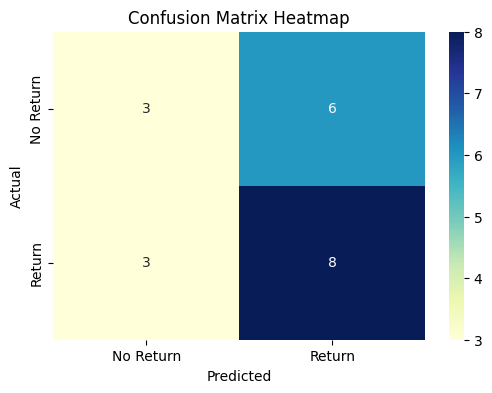

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


df = pd.read_csv('/content/product_return.csv')


df.dropna(inplace=True)


X = df.drop(columns=['returned'])
y = df['returned']

X = pd.get_dummies(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy * 100:.2f}%")


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=["No Return", "Return"], yticklabels=["No Return", "Return"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
